# モジュールのインポート

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

# chap. 2

## 線形モデル

w[0]: 0.393906  b: -0.031804


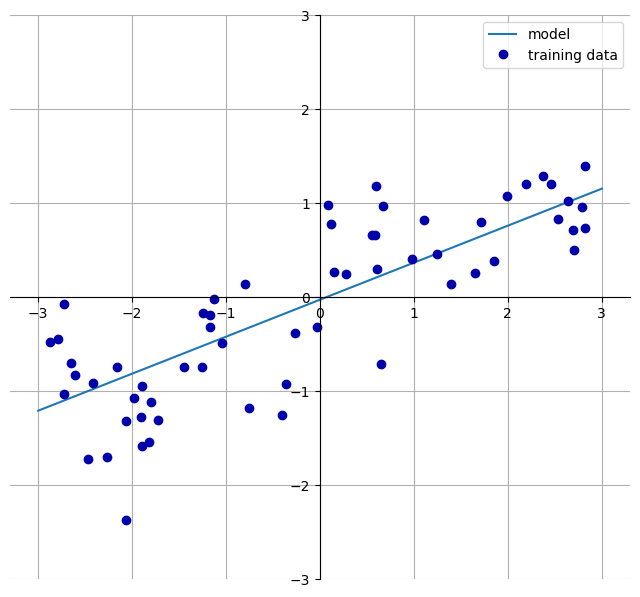

In [6]:
mglearn.plots.plot_linear_regression_wave()
# y = w[0]x[0] + b

In [7]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [8]:
print(f"lr.coef_:{lr.coef_}")
print(f"lr.intercept_:{lr.intercept_}")

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [9]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.67
Test set score: 0.66


In [10]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [11]:
print(f"Training set score:{lr.score(X_train, y_train):.2f}")
print(f"test set score:{lr.score(X_test, y_test):.2f}")
print("訓練とテストでスコアが乖離→過学習")

Training set score:0.95
test set score:0.61
訓練とテストでスコアが乖離→過学習


In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f"Training set score:{ridge.score(X_train, y_train):.2f}")
print(f"Test set score{ridge.score(X_test, y_test):.2f}")

Training set score:0.89
Test set score0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score:{ridge10.score(X_train, y_train):.2f}")
print(f"Test set score:{ridge10.score(X_test, y_test):.2f}")

Training set score:0.79
Test set score:0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"train set score:{ridge01.score(X_train, y_train):.2f}")
print(f"test set score:{ridge01.score(X_test, y_test):.2f}")

train set score:0.93
test set score:0.77


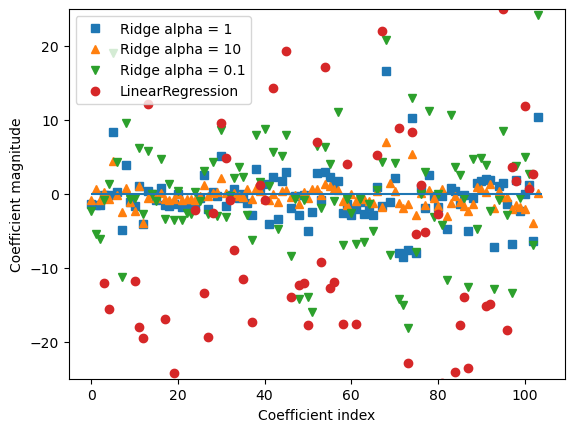

In [15]:
plt.plot(ridge.coef_, "s", label="Ridge alpha = 1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha = 10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha = 0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

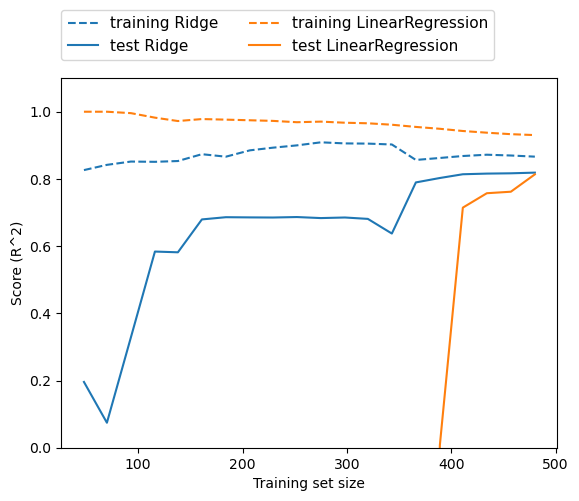

In [16]:
mglearn.plots.plot_ridge_n_samples()

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"Training set score:{lasso.score(X_train, y_train):.2f}")
print(f"test set score:{lasso.score(X_test, y_test):.2f}")
print(f"Number of features used:{np.sum(lasso.coef_ !=0)}")

Training set score:0.29
test set score:0.21
Number of features used:4


In [18]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score:{lasso001.score(X_train, y_train):.2f}")
print(f"test set score:{lasso001.score(X_test, y_test):.2f}")
print(f"Number of features:{np.sum(lasso001.coef_ != 0)}")

Training set score:0.90
test set score:0.77
Number of features:33


In [19]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score:{lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score:{lasso00001.score(X_test, y_test):.2f}")
print(f"Number of features used:{np.sum(lasso00001.coef_ !=0):.2f}")

Training set score:0.95
Test set score:0.64
Number of features used:96.00


Text(0, 0.5, 'Coefficient magnitude')

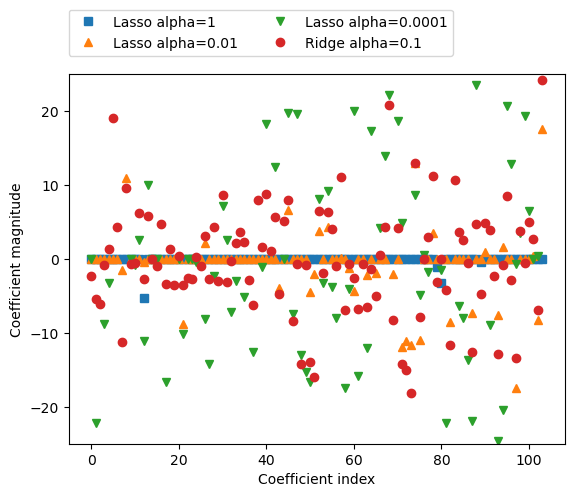

In [20]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

c:\Users\ueno2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


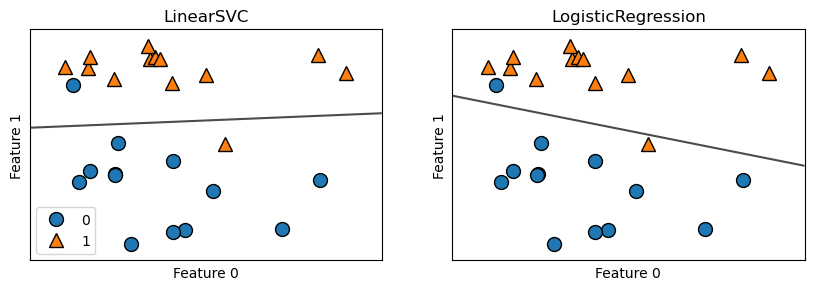

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

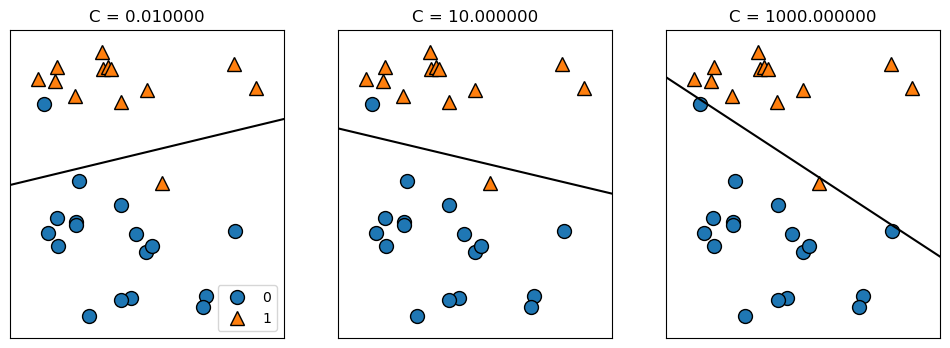

In [22]:
mglearn.plots.plot_linear_svc_regularization()

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.955
Test set score: 0.958


c:\Users\ueno2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.3f}")

Training set score: 0.958
Test set score: 0.958


c:\Users\ueno2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)
print(f"Training set score: {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_train, y_train):.3f}")

Training set score: 0.934
Test set score: 0.934


c:\Users\ueno2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


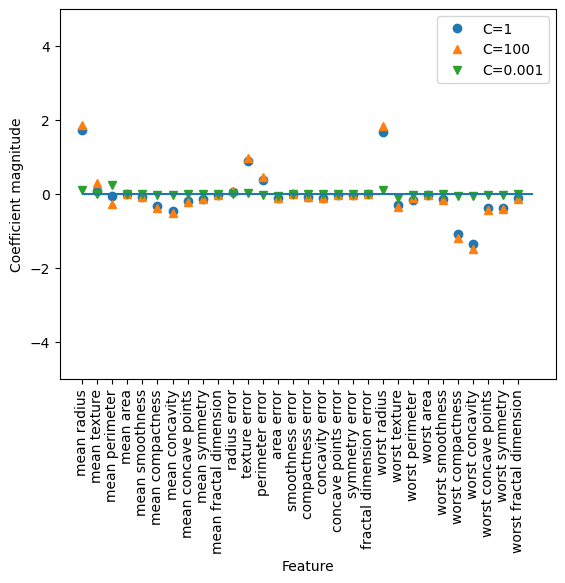

In [26]:
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
test accuracy of l1 logreg with C=100.000: 0.98


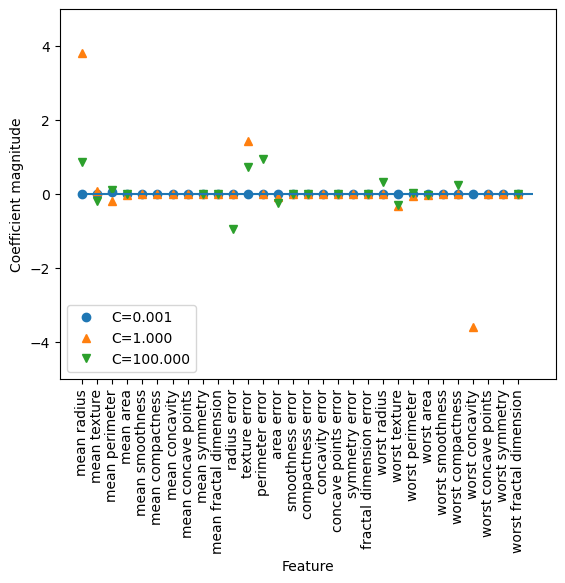

In [27]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear",max_iter=5000)
    lr_l1.fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"test accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_test, y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.3f}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

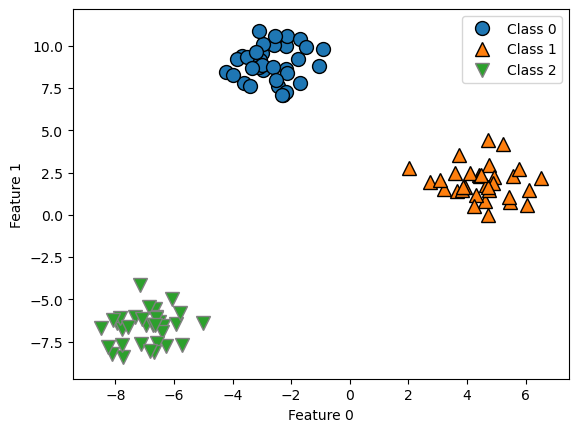

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [29]:
linear_svm = LinearSVC()
linear_svm.fit(X, y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


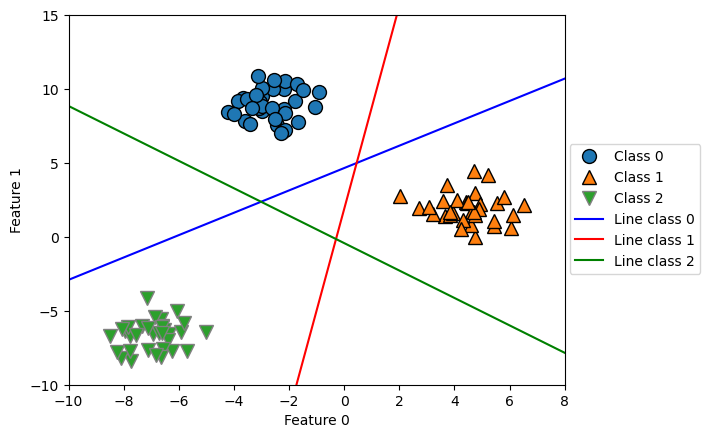

[-15.         -14.3877551  -13.7755102  -13.16326531 -12.55102041
 -11.93877551 -11.32653061 -10.71428571 -10.10204082  -9.48979592
  -8.87755102  -8.26530612  -7.65306122  -7.04081633  -6.42857143
  -5.81632653  -5.20408163  -4.59183673  -3.97959184  -3.36734694
  -2.75510204  -2.14285714  -1.53061224  -0.91836735  -0.30612245
   0.30612245   0.91836735   1.53061224   2.14285714   2.75510204
   3.36734694   3.97959184   4.59183673   5.20408163   5.81632653
   6.42857143   7.04081633   7.65306122   8.26530612   8.87755102
   9.48979592  10.10204082  10.71428571  11.32653061  11.93877551
  12.55102041  13.16326531  13.7755102   14.3877551   15.        ]


In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #(x,y)=全サンプルの特徴量の0番目と1番目を(X[:,0], X[:,1])として散布図を作製する関数、yはクラス(分類)ラベル
line = np.linspace(-15, 15) #-15~15を50分割→x軸の値に使用
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]): #zip(...)：これらを1組ずつまとめてループ
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.show()

#線形分類境界の式:w_0x + w_1y + b = 0 ,coef[0] = w_0, coef[1] = w_1, intercept = b
#coefは各クラスの重みの係数(coefficient)の略称、interceptはその切片

In [36]:
win_path = r"C:\Users\ueno2\OneDrive\デスクトップ\iCloudDrive\研究\FeCoNi3元合金\データ"

mac_path = win_path.replace(r"C:","").replace("\\", "/")

print(mac_path)

/Users/ueno2/OneDrive/デスクトップ/iCloudDrive/研究/FeCoNi3元合金/データ
